# QF600 Asset Pricing
## Stochastic Discount Factor
### Chia Jun Xian Edmund

Suppose that consumption growth has lognormal distribution with the possibility of rare disasters:

ln(g) = 0.02 + 0.02ε + ν

Here ε is a standard normal random variable, while ν is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%).

Simulate ε with (at least) 10e4 random draws from standard normal distribution, and simulate ν with (at least) 10e4 random draws from standard uniform distribution.

Use the simulated distribution of consumption growth to find the simulated distribution of the pricing kernel for power utility:

M = 0.99g ** -γ

Repeat this process for values of γ in the range from 1 to 4, in increments of 0.1 (or less). (Note that you can reuse the same simulated distribution of consumption growth for all values of γ). 

 - Calculate μM and σM for each value of γ, and plot σM/μM (on the vertical axis) vs γ (on the horizontal axis).

 - Find the smallest value of γ (in your data) for which σM/μM > 0.4. Explain (in words, without using any mathematical  equations or formulas) the economic significance of this result.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# generate gammas
gamma = \
    np \
        .linspace(
            0, 
            4, 
            num = 401
        )

In [3]:
def consumption_growth():
    
    # simulate epsilon using standard normal distribution
    epsilon = \
        np \
            .random \
                .standard_normal()

    # simulate nu from [0, 1]
    nu = \
        np \
            .random \
                .rand()

    # if nu falls below the probability, disaster else 0
    if nu <= 0.017:
        nu = \
            np \
                .log(0.65)
        
    else:
        nu = 0

    # consumption growth formula
    g = \
        np \
            .exp(
                0.02 + 0.02 * epsilon + nu
            )

    return g

In [4]:
# monte carlo trials
trials = 100000

# placeholder to store all the consumption growth values
g = []

np.random.seed(1)

# simulate
for trial in range(trials):
    
    g.append(consumption_growth())


In [5]:
# computing pricing kernal
pricing_kernal = \
    {
        'gamma' : [],
        'mu' : [],
        'sigma' : []
    }

# for each gamma, calculate the pricing kernal, mean and sd
for gammas in gamma:
    
    M = 0.99 * g ** - gammas

    mu_M = M.mean()

    sigma_M = M.std()

    pricing_kernal['gamma'].append(gammas)
    pricing_kernal['mu'].append(mu_M)
    pricing_kernal['sigma'].append(sigma_M)

pricing_kernal = pd.DataFrame(pricing_kernal)

# computing the volatility ratio
pricing_kernal['sigma_over_mu'] = pricing_kernal.sigma / pricing_kernal.mu

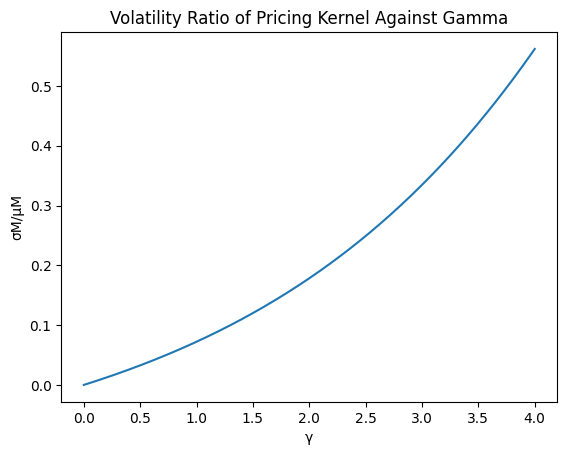

In [6]:
plt \
    .plot(pricing_kernal['gamma'], 
         pricing_kernal['sigma_over_mu'])

plt \
    .xlabel('γ')

plt \
    .ylabel('σM/μM')

plt \
    .title('Volatility Ratio of Pricing Kernel Against Gamma')

plt.show()

In [7]:
print(
    'The smallest value of γ (in your data) for which σM/μM > 0.4 = ', 
    round(
        pricing_kernal[
            pricing_kernal['sigma_over_mu'] > 0.4
            ]['gamma'] \
                .iloc[0, ], 
        1
    )
)

The smallest value of γ (in your data) for which σM/μM > 0.4 =  3.3


### Explain (in words, without using any mathematical  equations or formulas) the economic significance of this result.

According to the Hansen–Jagannathan (H–J) bound, the volatility ratio of pricing kernel cannot be less than the highest sharpe ratio of all possible portfolios. In addition, the pricing kernel has a lower limit of 0 without an upper bound, implying that the probability distribution must be heavily skewed to the right. Based on historical data, the sharpe ratio of US stock market is 0.4 and the standard deviation of consumption growth based on real annual per capita consumption for post-war US economy is approximately 2%. Applying the H-J bound, with the assumption that investor with time separable power utility of consumption and lognormal consumption growth, investor must have a constant relative risk aversion of > 20 which is an unreasonably high. Since the consumption growth is stable but pricing kernel is very volatile, for the H-J bound to hold, investor must have a high degree of risk aversion as risk aversion magnifies the volatility of consumption growth. This results in the equity premium puzzle where it is impossible to generate a equity premium that is large enough unless we assume that investors have an unreasonably high risk aversion. This begs the question of whether investors truly have an unreasonably high risk aversion or the H-J bound doesn’t hold. 

Looking at the assumptions, empirical evidence supports the fact that the probability distribution of the pricing kernel should have a large amount of right skewness which aligns with the assumption that for investor with power utility of consumption, the distribution of the pricing kernel will be right skewed and increases with investor’s relative risk aversion. If we were to maintain the assumption that investors have time separable power utility of consumption, then it could mean that empirical data on post war consumption understates the volatility and skewness of consumption growth (consumption growth is not lognormal). Historical data usually covers time periods without disasters, which makes consumption growth appear less volatile, resulting in the understatement of the negative skewness in consumption growth.

By considering the possibility of rare disasters, such as war, great depression, disease outbreaks etc., which result in the occasional 1/3 fall in consumption growth with the given probability, the volatility and negative skewness of consumption growth increases, causing the distribution to be more left skewed. Therefore, to achieve the same volatility ratio of the pricing kernel, investors' degree of relative risk aversion will be reduced to 3.3, which is reasonable. As a result, the H-J bound is satisfied for relative risk aversion of 3.3, eliminating the equity premium puzzle.